In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from tensorflow.keras.datasets import mnist
# Loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

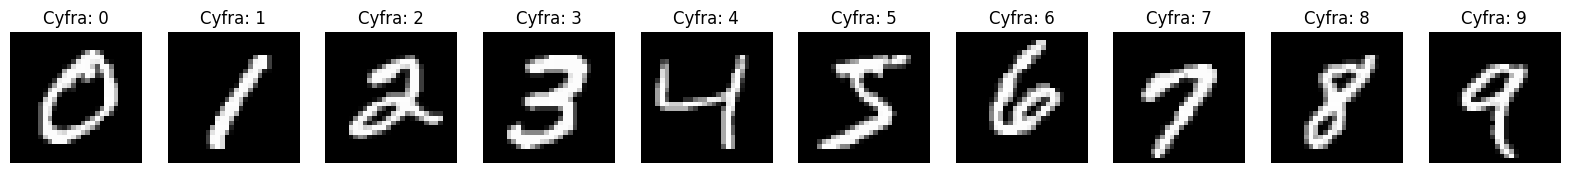

In [4]:
# Showing examples
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    index = np.where(y_train == digit)[0][0]
    axes[digit].imshow(x_train[index], cmap='gray')
    axes[digit].set_title(f'Cyfra: {digit}')
    axes[digit].axis('off')
plt.show()

In [5]:
# Dataset splitting
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Training set size: {x_train.shape[0]}')
print(f'Validation set size: {x_val.shape[0]}')
print(f'Test set size: {x_test.shape[0]}')

Training set size: 48000
Validation set size: 12000
Test set size: 10000


In [6]:
# Converting to dataset object
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

batch_size = 32

# GPU optimization + training shuffle
train_dataset = train_dataset.shuffle(len(x_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [7]:
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2

num_classes = 10  # MNIST has 10 classes

# MNIST images are 28x28 pixels and grayscale (1 channel)
IMG_SIZE = 28
CHANNELS = 1  # Black and whtie

model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.5), 
    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, verbose=1, restore_best_weights=True, mode='min')

checkpoint_cb = ModelCheckpoint(
    'model_v1',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

epochs = 20

history = model.fit(
    train_dataset, 
    epochs=epochs, 
    validation_data=val_dataset,
    callbacks=[checkpoint_cb, early_stopping_callback]
)

Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.3524 - accuracy: 0.9113

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 11s 5ms/step - loss: 0.3523 - accuracy: 0.9113 - val_loss: 0.1250 - val_accuracy: 0.9812
Epoch 2/20
1493/1500 [============================>.] - ETA: 0s - loss: 0.1632 - accuracy: 0.9729

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.1630 - accuracy: 0.9730 - val_loss: 0.1118 - val_accuracy: 0.9858
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1426 - accuracy: 0.9789 - val_loss: 0.1152 - val_accuracy: 0.9861
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1257 - accuracy: 0.9842 - val_loss: 0.1130 - val_accuracy: 0.9858
Epoch 5/20
1488/1500 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.9850

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.1205 - accuracy: 0.9850 - val_loss: 0.1020 - val_accuracy: 0.9898
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1097 - accuracy: 0.9867 - val_loss: 0.1026 - val_accuracy: 0.9892
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1073 - accuracy: 0.9875 - val_loss: 0.1067 - val_accuracy: 0.9875
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1011 - accuracy: 0.9881 - val_loss: 0.1120 - val_accuracy: 0.9869
Epoch 9/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.0973 - accuracy: 0.9893

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0972 - accuracy: 0.9893 - val_loss: 0.0936 - val_accuracy: 0.9894
Epoch 10/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0951 - accuracy: 0.9896 - val_loss: 0.1008 - val_accuracy: 0.9886
Epoch 11/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0904 - accuracy: 0.9904 - val_loss: 0.0958 - val_accuracy: 0.9906
Epoch 12/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0870 - accuracy: 0.9913 - val_loss: 0.0961 - val_accuracy: 0.9891
Epoch 13/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.0886 - accuracy: 0.9899

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0887 - accuracy: 0.9899 - val_loss: 0.0906 - val_accuracy: 0.9903
Epoch 14/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.0847 - accuracy: 0.9908

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0846 - accuracy: 0.9908 - val_loss: 0.0904 - val_accuracy: 0.9910
Epoch 15/20
1489/1500 [============================>.] - ETA: 0s - loss: 0.0832 - accuracy: 0.9912

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0833 - accuracy: 0.9911 - val_loss: 0.0895 - val_accuracy: 0.9901
Epoch 16/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0807 - accuracy: 0.9918 - val_loss: 0.0968 - val_accuracy: 0.9893
Epoch 17/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0797 - accuracy: 0.9915 - val_loss: 0.0917 - val_accuracy: 0.9902
Epoch 18/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.0801 - accuracy: 0.9911

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0801 - accuracy: 0.9911 - val_loss: 0.0846 - val_accuracy: 0.9913
Epoch 19/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0756 - accuracy: 0.9925 - val_loss: 0.0898 - val_accuracy: 0.9894
Epoch 20/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0748 - accuracy: 0.9927 - val_loss: 0.0909 - val_accuracy: 0.9899


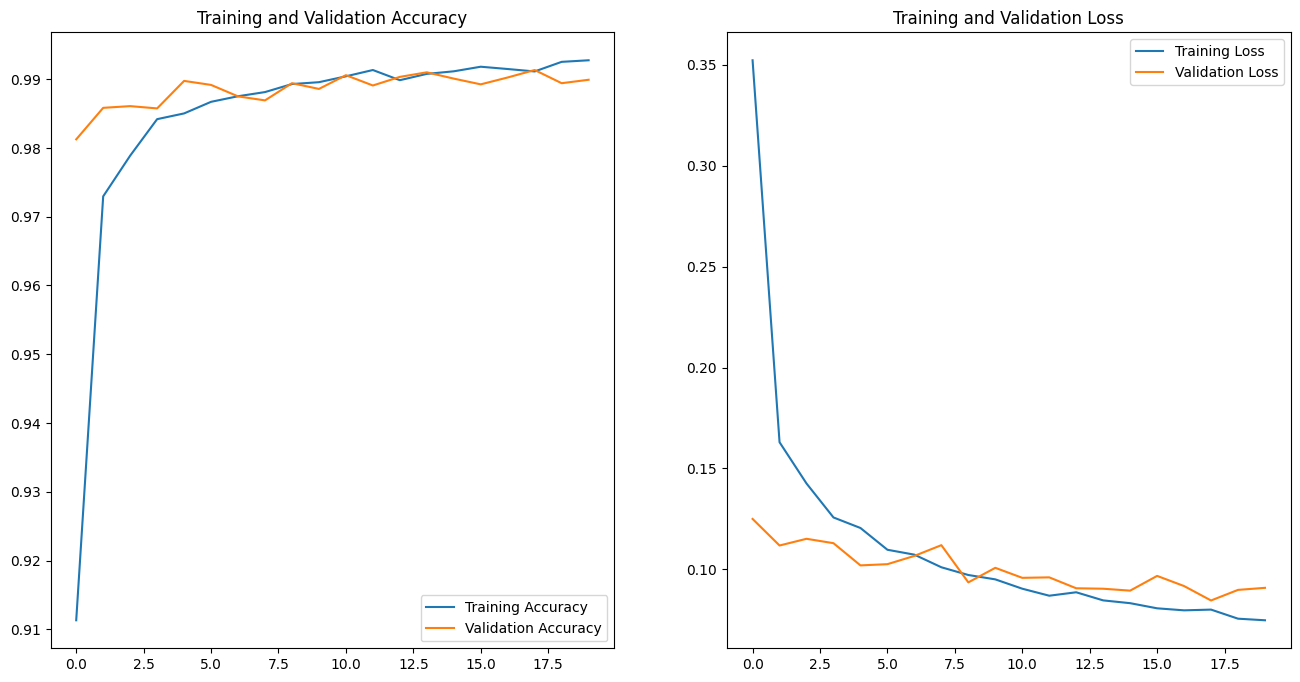

In [10]:
from helper_functions import plot_training_history_class
plot_training_history_class(history)

In [11]:
model.evaluate(val_dataset)

375/375 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9899


[0.0908658429980278, 0.9899166822433472]

In [12]:
model.evaluate(test_dataset)

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9916


[0.07577180117368698, 0.991599977016449]

In [13]:
from tensorflow.keras.models import load_model

# Loading best model
best_model = load_model('model_v1')

In [14]:
best_model.evaluate(test_dataset)

313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9916


[0.08019974827766418, 0.991599977016449]

In [15]:
y_pred_probs = best_model.predict(test_dataset)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = np.argmax(y_pred_probs, axis=1)
n_classes = y_pred_probs.shape[1]  # liczba klas

313/313 [==============================] - 1s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

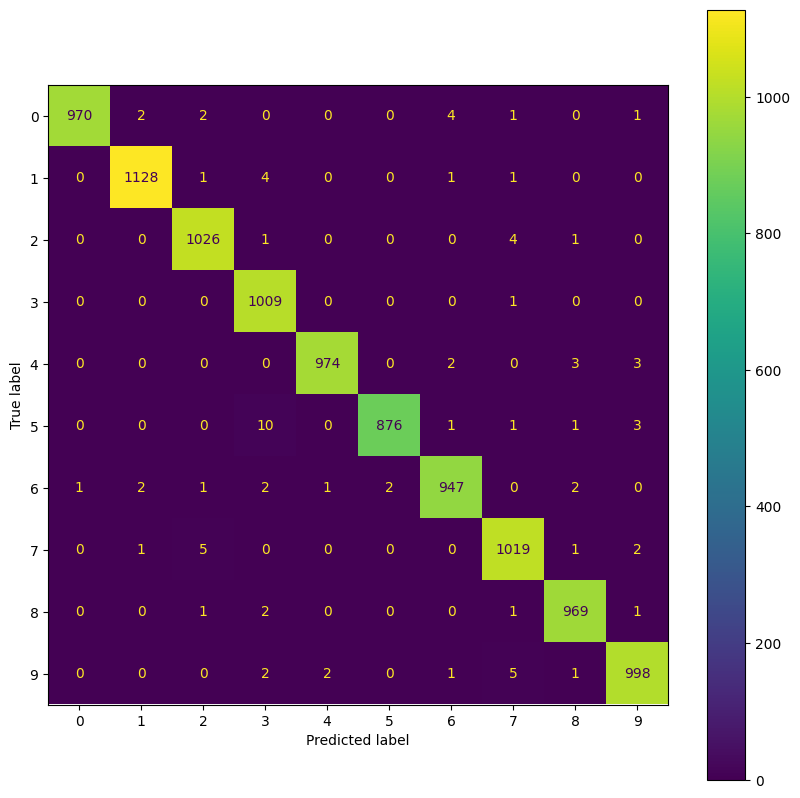

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(cm).plot(ax=ax)
plt.show

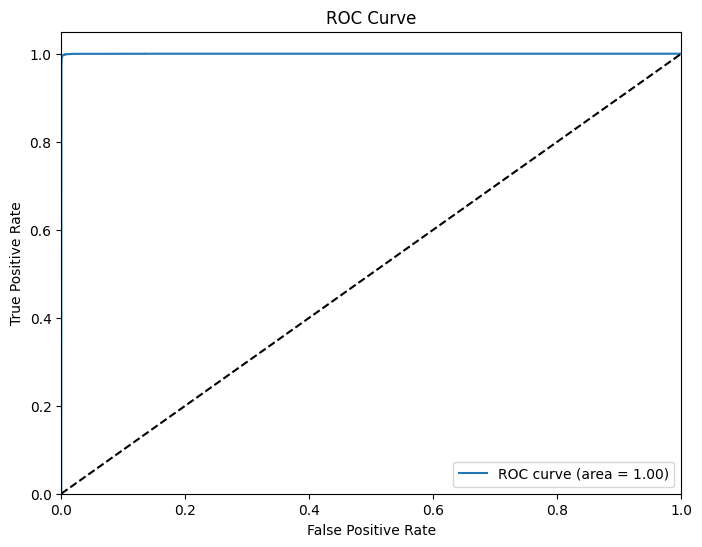

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize
y_true_binarized = label_binarize(y_true, classes=range(n_classes))

# Calculations
fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# ROC-curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

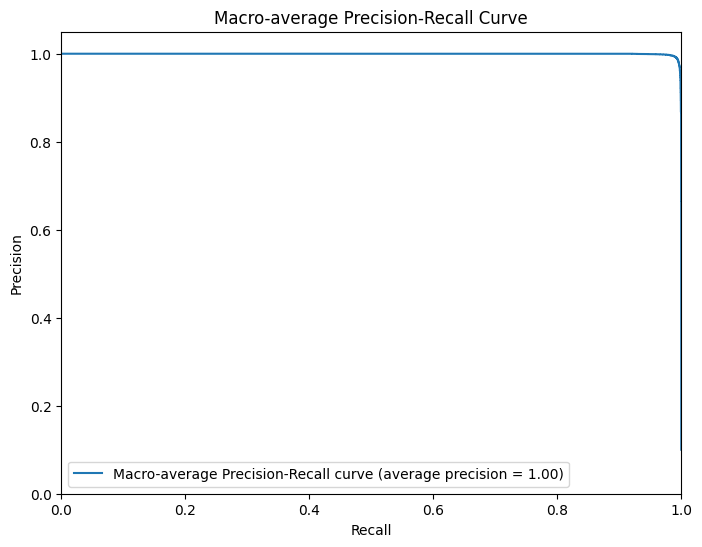

In [18]:
from helper_functions import calculate_and_plot_precision_recall_curve
calculate_and_plot_precision_recall_curve(y_true, y_pred_probs, n_classes)

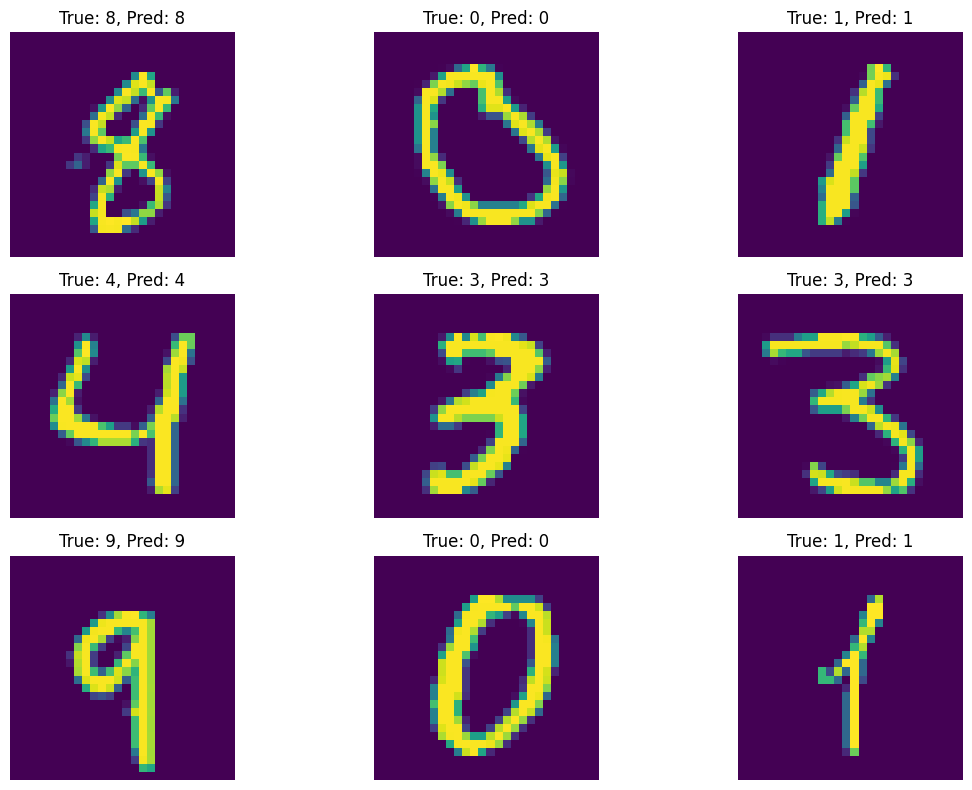

In [19]:
from helper_functions import display_random_images_with_predictions
display_random_images_with_predictions(test_dataset, y_true, y_pred_probs, total_images=9)

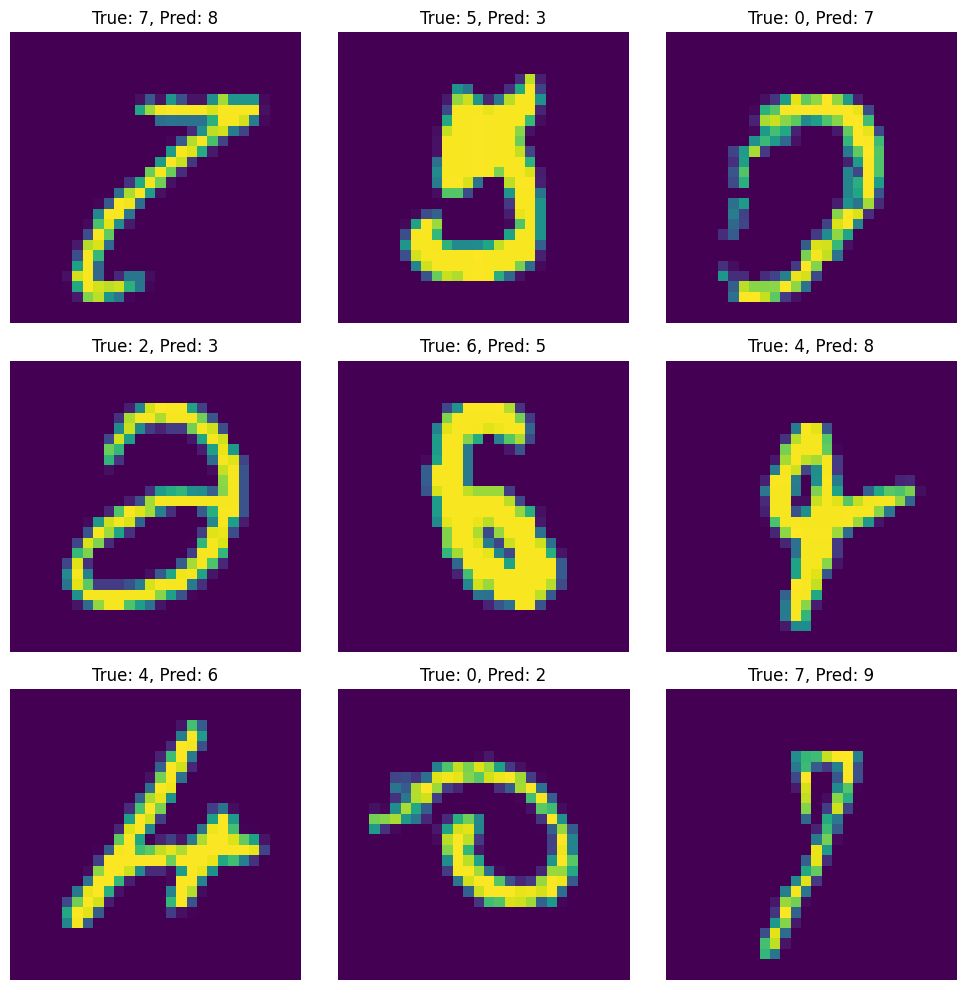

In [20]:
from helper_functions import display_misclassified_images
display_misclassified_images(test_dataset, y_true, y_pred, total_images=9)